In [1]:
import pandas as pd
from langdetect import detect
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./buenos_aires/buenos_aires_reviews.csv')

In [3]:
df2 = df[df.comments.str[:34] != "The host canceled this reservation"]
# df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[:6000]
df2

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett..."
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...
...,...,...,...,...,...,...
6014,78703,103438968,2016-09-22,37025009,Julien,"\r\nThe apartment was a charming place , comfo..."
6015,78703,104624969,2016-09-27,12160044,Eduardo,Óscar es un buen anfitrión. Muy atento y preoc...
6016,78703,105948960,2016-10-03,16563847,Alejandra Francisca,Thank you Oscar for your outstanding hospitali...
6017,78703,106851651,2016-10-08,33485182,Gabriela,El apto. Es pequeñito pero acogedor y con todo...


In [4]:
df3 = df2['comments']
dfl = df3.str.len()
dfl.mean(axis = 0)

349.98016666666666

In [5]:
langs = []
for i in df3:
    try:
        langs.append(detect(i))
    except:
        langs.append('Nan')
        continue

In [6]:
dfnew = df2.copy()
dfnew['lang'] = langs
dfnew

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...,en
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...,en
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett...",en
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...,en
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...,en
...,...,...,...,...,...,...,...
6014,78703,103438968,2016-09-22,37025009,Julien,"\r\nThe apartment was a charming place , comfo...",en
6015,78703,104624969,2016-09-27,12160044,Eduardo,Óscar es un buen anfitrión. Muy atento y preoc...,es
6016,78703,105948960,2016-10-03,16563847,Alejandra Francisca,Thank you Oscar for your outstanding hospitali...,en
6017,78703,106851651,2016-10-08,33485182,Gabriela,El apto. Es pequeñito pero acogedor y con todo...,es


In [7]:
dfnew = dfnew[(dfnew['lang']=='es') | (dfnew['lang']=='en')]

In [8]:
date = pd.to_datetime(dfnew['date'])
del dfnew['date']
dfnew = pd.concat((dfnew, date), axis = 1, join='inner')
dfnew

,listing_id,id,reviewer_id,reviewer_name,comments,lang,date
0,7270,1015127,1586988,Morgan,Great apartment in a fantastic location. Booke...,en,2012-03-18
1,7270,1041539,1476835,Terence,Toni was a great host and looked after me in B...,en,2012-03-25
2,7270,1122580,2087599,Antonio David,"Toni is a great guy and has a great loft, bett...",en,2012-04-13
3,7270,2580924,1523475,Noémie,The apartment is very well located in the beau...,en,2012-10-11
4,7270,2795303,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...,en,2012-11-03
...,...,...,...,...,...,...,...
6014,78703,103438968,37025009,Julien,"\r\nThe apartment was a charming place , comfo...",en,2016-09-22
6015,78703,104624969,12160044,Eduardo,Óscar es un buen anfitrión. Muy atento y preoc...,es,2016-09-27
6016,78703,105948960,16563847,Alejandra Francisca,Thank you Oscar for your outstanding hospitali...,en,2016-10-03
6017,78703,106851651,33485182,Gabriela,El apto. Es pequeñito pero acogedor y con todo...,es,2016-10-08


In [9]:
df_es = dfnew[(dfnew['lang']=='es')]
df_en = dfnew[(dfnew['lang']=='en')]

es_data = df_es.groupby([df_es['date'].dt.year.rename('year'), df_es['date'].dt.month.rename('month')]).agg({'count'}).reset_index();
en_data = df_en.groupby([df_en['date'].dt.year.rename('year'), df_en['date'].dt.month.rename('month')]).agg({'count'}).reset_index();

es_data['year-month'] = es_data['year'].map(str) +'-'+ es_data['month'].map(str)
en_data['year-month'] = en_data['year'].map(str) +'-'+ en_data['month'].map(str)
es_data.columns = ['year', 'month',"listing_id", 'id', 'reviewer_id', 'reviewer_name', 'comments', 'lang', 'date', 'year-month']
en_data.columns = ['year', 'month',"listing_id", 'id', 'reviewer_id', 'reviewer_name', 'comments', 'lang', 'date', 'year-month']

es_data

,year,month,listing_id,id,reviewer_id,reviewer_name,comments,lang,date,year-month
0,2010,8,1,1,1,1,1,1,1,2010-8
1,2010,12,1,1,1,1,1,1,1,2010-12
2,2011,5,1,1,1,1,1,1,1,2011-5
3,2011,7,3,3,3,3,3,3,3,2011-7
4,2011,8,2,2,2,2,2,2,2,2011-8
...,...,...,...,...,...,...,...,...,...,...
99,2019,7,22,22,22,22,22,22,22,2019-7
100,2019,8,20,20,20,20,20,20,20,2019-8
101,2019,9,11,11,11,11,11,11,11,2019-9
102,2019,10,18,18,18,18,18,18,18,2019-10


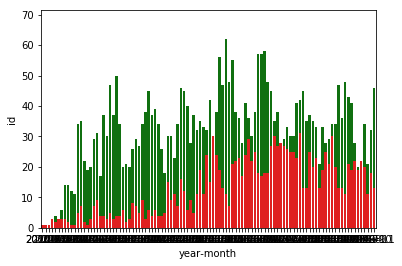

In [10]:
# tips = sns.load_dataset('es_data')
sns.barplot(x=en_data['year-month'] ,y=en_data['id'], color = 'green')
sns.barplot(x=es_data['year-month'] ,y=es_data['id'], color = 'red')